# BBGKY Hierarchy for Curie Weiss 1D spin model

The code written according to Mori's paper i.e. ZZX model (I'll convert it into XXZ model latter). 
<br>
The correlation G-matrix and delta(Sigma s') are zero initially.

### The BBGKY hierarchy with $\delta t$ formulation

##### 02 March 2020

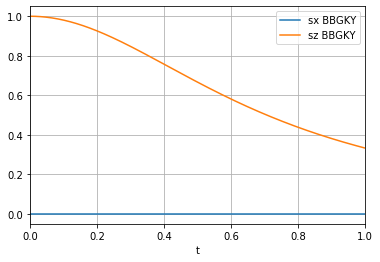

In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def dsx(hx, delta_t):
    dsx = -16.0*np.power(hx,3.0)*np.power(delta_t,3.0)+2.0*\
    (128.0*np.power(hx,5.0)*np.power(delta_t,5.0)-8.0*hx*np.power(delta_t,2.0))
    return dsx

def dsz(hx, delta_t):
    dsz = - 4.0 * hx * hx * delta_t
    return dsz

omega = 25.0

sx0 = 0.0
sz0 = 1.0
delta_t = np.linspace(0.0,10.0,5000)
hx = 25.0 * np.cos(omega * delta_t)
sx = odeint(dsx, sx0, delta_t)
sz = odeint(dsz, sz0, delta_t)

plt.plot(delta_t, sx, label = "sx BBGKY")
plt.plot(delta_t, sz, label = "sz BBGKY")
plt.xlabel("t")
plt.xlim(0.0, 1.0)
plt.legend()
plt.grid()
plt.show()     

### Only the function are defined here and the function are verfied
##### Follow T.Mori's paper 
##### 09 March 2020

In [25]:
import numpy as np
from scipy.sparse import dia_matrix
from math import *
from itertools import combinations
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import time as tm


#Pauli matrices
sig_x, sig_y, sig_z = \
  np.array([[0j, 1.0+0j], [1.0+0j, 0j]]), \
    np.array([[0j, -1j], [1j, 0j]]), \
      np.array([[1.0+0j, 0j], [0j, -1+0j]])
sig_plus = (sig_x + sig_y*1j)/2.0
sig_minus = (sig_x - sig_y*1j)/2.0
# Required parameters
N = 4                # lattice size
t = np.linspace(0.0,1.0,n)
alpha = 0.2
omega = 0.0
# Initial values: ACCORDING TO MORI'S PAPER i.e. ZZX model
jx, jy, jz = 0.0, 0.0, -1.0 
hx, hy, hz = -1.0, 0.0, 0.0
sx, sy, sz = 0.0, 0.0, 1.0
# Periodic Boundary Condition
def jmat(N, alpha):
    J = dia_matrix((N, N))
    mid_diag = np.floor(N/2).astype(int)
    for i in np.arange(1,mid_diag+1):
        elem = pow(i, -alpha)
        J.setdiag(elem, k=i)
        J.setdiag(elem, k=-i)
    for i in np.arange(mid_diag+1, N):
        elem = pow(N-i, -alpha)
        J.setdiag(elem, k=i)
        J.setdiag(elem, k=-i)
    return J.toarray()
J = jmat(N, alpha)

gmat = np.zeros((N,3,3))
wmat = np.array([[0, 2 * (sz + hz), 0], [- 2 * (sz + hz), 0, 2 *hx],\
                  [0, - 2 * hx, 0]])
v_vec = np.array([[2 * sy], [- 2 * sx], [0.0]])
f_vec = np.array([[- sx * sz], [- sy * sz], [1 - sz * sz]])

def fsx(sx,sy,sz,N):
    dsx = 2.0 * sy * sz + 2 * hz * sy +\
                2 * np.sum(J[i,j] * gmat[j,1,2] \
                           for i in np.arange(N) for j in np.arange(1,N))
    return dsx
    
                                           
def fsy(sx,sy,sz,N):
    dsy  = -2.0 * sx * sz - 2 * hz * sx +\
    2 * hx * sz - 2 * (np.sum(J[i,j] *\
                                       gmat[j,0,2] for i in \
                                       np.arange(N) for j in np.arange(1,N)))
    return dsy

def fsz(sx,sy,sz,N):
    dsz = - 2.0 * hx * sy
    return dsz

def gcorr(a,b,k):
    left = np.sum(np.dot(wmat[a,c], gmat[k,c,b]) + np.dot(wmat[b,c], gmat[k,a,c]) for c in np.arange(3))
    mdl1 = v_vec[a] * np.sum(np.dot(J[0, j], gmat[np.absolute(j-k) + 1, 2, b]) for j in np.arange(1,k))
    mdl2 = v_vec[b] * np.sum(np.dot(J[k, j], gmat[j,a,2]) for j in np.arange(1,k))
    rght = J[0, k] * (np.dot(v_vec[a], f_vec[b]) + np.dot(v_vec[b], f_vec[a]))
    gcor = left + mdl1 + mdl2 + rght
    return gcor

print("code seems to be okay till now!!")

code seems to be okay till now!!


### Sample python code for coupled differential equation for "odeint"

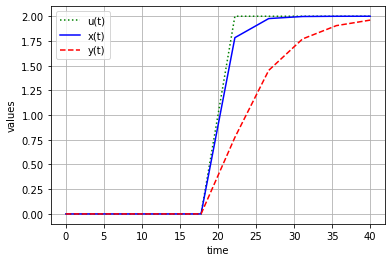

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

z0 = [0,0]
n = 10
t = np.linspace(0,40,n)
u = np.zeros(n)
u[5:] = 2.0
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]

for i in range(1,n):
    tspan = [t[i-1],t[i]]
    z = odeint(model,z0,tspan,args=(u[i],))
    x[i] = z[1][0]
    y[i] = z[1][1]
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.grid()
plt.legend(loc='best')
plt.show()

##  BBGKY Final code

##### THE BBGKY HEIRARCHY FOR ONE DIMENSIONAL SPIN SYSTEM BASED ON CURIE WEISS 1D SPIN SYSTEM MODEL WITH TRANSVERSE SYMMETRY BREAKING FIELD
##### reference:

##### 1. Mori, T. “[1810.01584] Prethermalization in the Transverse-Field Ising Chain with Long-Range Interactions.” Accessed October 30, 2019. https://arxiv.org/abs/1810.01584.

Here the model is ZZX and initial state is considered as the eigen state of $\sigma^z$


#### When $\alpha = 0$

run started!
code is okay!!


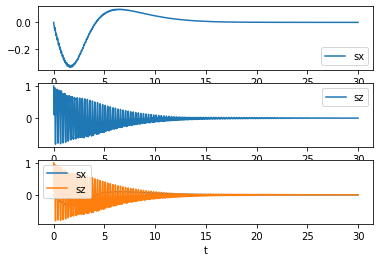

In [2]:
import numpy as np
from scipy.sparse import dia_matrix
from math import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import time as tm

# Required parameters
N = 6               # the number of spin in the lattice
alpha = 0.0         # the number of order parameter; alpha = 0 is meanfield limit
omega = 25.0        # frequency of the periodic symmetry breaking field
hdc = 0.1           # this is the dc part or constant part of the symmetry breaking field
amp = 25.0          # amplitude of the symmetry breaking field
n = 1500            # number of time steps for odeint 

# Initial values: ACCORDING TO MORI'S PAPER i.e. ZZX model
jx, jy, jz = 0.0, 0.0, -1.0 
hx, hy, hz = -1.0 * amp, 0.0, 0.0


# Initial odeint state
# the intial state is considered as the transverse initial state of the the direction
# of the symmetry breaking field. Here in ZZX model, the symmetry breaking field is 
# in the "x" direction. So the inititial state is taken as the transverse of "x" which is "Z"
# this the initital state is considered as the eigen state of the Pauili's "sigma_z" 
# herer we are trying to find out the expectation value of "Sx" with BBGKY applied on it.
# so the ground state becomes zero as <psi_z| sigma_x | psi_z> = 0


# Periodic Boundary Condition
def jmat(N, alpha):
    J = dia_matrix((N, N))
    mid_diag = np.floor(N/2).astype(int)
    for i in np.arange(1,mid_diag+1):
        elem = pow(i, -alpha)
        J.setdiag(elem, k=i)
        J.setdiag(elem, k=-i)
    for i in np.arange(mid_diag+1, N):
        elem = pow(N-i, -alpha)
        J.setdiag(elem, k=i)
        J.setdiag(elem, k=-i)
    return J.toarray()
J = jmat(N, alpha)

gmat = np.zeros((N,3,3))
ttt = 0.0                 #initialze the time as zero
wmat = np.array([[0, 2 * (sz[0] + hz), 0], \
                  [- 2 * (sz[0] + hz), 0, 2 * (hx * np.cos(omega * tttt) + hdc)],\
                  [0, - 2 * (hx * np.cos(omega * tttt) + hdc), 0]])
v_vec = np.array([[2 * sy[0]], [- 2 * sx[0]], [0.0]])
f_vec = np.array([[- sx[0] * sz[0]], [- sy[0] * sz[0]], [1 - sz[0] * sz[0]]])

def gcorr(G,t,k,a,b,wmat,gmat,v_vec,f_vec):
    left = sum(np.dot(wmat[a,c], gmat[k,c,b]) + np.dot(wmat[b,c], gmat[k,a,c]) for c in np.arange(3))
    mdl1 = v_vec[a] * sum(np.dot(J[0, j], gmat[np.absolute(j-k) + 1, 2, b]) for j in np.arange(1,k))
    mdl2 = v_vec[b] * sum(np.dot(J[k, j], gmat[j,a,2]) for j in np.arange(1,k))
    rght = J[0, k] * (np.dot(v_vec[a], f_vec[b]) + np.dot(v_vec[b], f_vec[a]))
    gc   = left + mdl1 + mdl2 + rght
    return gc

def g_t(k,i,j,t,gstate,wmat,gmat,v_vec,f_vec):
    d_t = t
    a,b = i,j
    G = odeint(gcorr, gstate, d_t, args=((k,a,b,wmat,gmat,v_vec,f_vec)))
    gstate = G[1]
    return G[1]

def zzx_model(dxyz, tspan, gstate,ts):
    t = ts
    sx, sy, sz = dxyz[0], dxyz[1], dxyz[2]
    
    v_vec = np.array([[2 * sy], [- 2 * sx], [0.0]])
    f_vec = np.array([[- sx * sz], [- sy * sz], [1 - sz * sz]])
    hx1 = hx * np.cos(omega * t[1]) + hdc
    wmat = np.array([[0, 2 * (sz + hz), 0], [- 2 * (sz + hz), 0, 2.0 * hx1], [0.0, - 2.0 * hx1, 0]])
    
    dsx = 2.0 * sy * sz + 2.0 * hz * sy + 2.0 * sum(J[0,j] * g_t(j,1,2,t,gstate,wmat,gmat,v_vec,f_vec) for j in np.arange(1,N))
    # here t[1] is taken as in the odeint, the integration in limited in lower and upper boundary condition.
    # After each "Odeint" operation, the pointer or the programming courser goes to the final boundary condition.
    # which is t[1] here. Thats the reason I have taken time value as t[1] at the line bellow.
    dsy = - 2.0 * sx * sz - 2.0 * hz * sx + 2.0 * (hx  * np.cos(omega * t[1]) + hdc) * sz - 2.0 * (sum(J[0,j] * g_t(j,0,2,t,gstate,wmat,gmat,v_vec,f_vec) for j in np.arange(1,N)))
    dsz = - 2.0 * (hx * np.cos(omega * t[1]) + hdc) * sy
    dxyz = [dsx, dsy, dsz]   
    return dxyz

z0 = np.array([0.0, 0.0, 1.0], dtype=np.float64)
t = np.linspace(0.0,30.0,n)       
sx, sy, sz = np.zeros(n), np.zeros(n), np.zeros(n)
sx[0],sy[0],sz[0] = z0[0],z0[1],z0[2]
gstate = 0.0

print("run started!")

for i in range(1,n):
    # as the odeint for coupled differential equation runs for single time interval due to its coupled behavior.
    tspan = [t[i-1],t[i]]        
    ts = tspan
    # in args=((gstate, ts)) , ts is taken as argument, because odeint runs more interval than the time steps entered 
    # in the "odeint()" syntax. Like if I have entered the the time stpes= np.linspace(0,1,10), but in reality
    # it runs more steps in the "odeint" function when it runs. Thus is can cause ambiguity in the time steps I want
    # in other calculations in "zzx_model" function. So i have made "ts" as argumenmt.
    dxyz = odeint(zzx_model, z0, tspan, args=((gstate,ts)))
    sx[i],sy[i],sz[i] = dxyz[1][0],dxyz[1][1],dxyz[1][2]
    z0 = dxyz[1] 

#np.savetxt("bbgky_t_sx_sz_N8_alpha0.txt",np.vstack((np.real(t), np.real(sx), np.real(sz))).T)

print("code is okay!!")

plt.title("time evolution for BBGKY zzx model")
plt.subplot(311)
plt.plot(t,sx, label="sx")
plt.legend()
plt.subplot(312)
plt.plot(t,sz, label="sz")
plt.legend()
plt.subplot(313)
plt.plot(t,sx, label="sx")
plt.plot(t,sz, label="sz")
plt.legend()
plt.xlabel("t")
#plt.savefig("bbgky_zzx_model_N8_alpha0.jpeg", dpi=300)
plt.show()